# Electrical Fault detection

We have to predict faults in a power system.

# Dataset Desciption

The dataset contains one file 

detect_dataset.csv

shape of the dataset is (12001, 9)

# Columns in dataset

there are seven columns

'Output (S)',

'Ia',

'Ib',

'Ic',

'Va', 

'Vb', 

'Vc', 

'Unnamed: 7',

'Unnamed: 8'

Outputs - 0 (No-fault) or 1(Fault is present)

In [1]:
# Importing Necessary Libraries
#importing necessary libraries
#importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from tqdm import tqdm

In [2]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [47]:
# Read csv file using pandas
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Cloud-ML Projects/Electrical Fault Detection/detect_dataset.csv")

In [48]:
df.head()

,Output (S),Ia,Ib,Ic,Va,Vb,Vc,Unnamed: 7,Unnamed: 8
0,0,-170.472196,9.219613,161.252583,0.054490,-0.659921,0.605431,NaN,NaN
1,0,-122.235754,6.168667,116.067087,0.102000,-0.628612,0.526202,NaN,NaN
2,0,-90.161474,3.813632,86.347841,0.141026,-0.605277,0.464251,NaN,NaN
3,0,-79.904916,2.398803,77.506112,0.156272,-0.602235,0.445963,NaN,NaN
4,0,-63.885255,0.590667,63.294587,0.180451,-0.591501,0.411050,NaN,NaN


# basic EDA

In [49]:
#check shape of the dataset
df.shape

(12001, 9)

In [50]:
# check columns of dataset
df.columns

Index(['Output (S)', 'Ia', 'Ib', 'Ic', 'Va', 'Vb', 'Vc', 'Unnamed: 7',
       'Unnamed: 8'],
      dtype='object')

In [51]:
# check length of dataset
df.shape[0]

12001

In [52]:
# Check which columns are having categorical, numerical or boolean values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12001 entries, 0 to 12000
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Output (S)  12001 non-null  int64  
 1   Ia          12001 non-null  float64
 2   Ib          12001 non-null  float64
 3   Ic          12001 non-null  float64
 4   Va          12001 non-null  float64
 5   Vb          12001 non-null  float64
 6   Vc          12001 non-null  float64
 7   Unnamed: 7  0 non-null      float64
 8   Unnamed: 8  0 non-null      float64
dtypes: float64(8), int64(1)
memory usage: 843.9 KB


In [53]:
# For more information on the dataset like the total count in all the columns of train data
# min, max values and more information of the respective columns 
df.describe()

,Output (S),Ia,Ib,Ic,Va,Vb,Vc,Unnamed: 7,Unnamed: 8
count,12001.000000,12001.000000,12001.000000,12001.000000,12001.000000,12001.000000,12001.000000,0.0,0.0
mean,0.457962,6.709369,-26.557793,22.353043,0.010517,-0.015498,0.004980,NaN,NaN
std,0.498250,377.158470,357.458613,302.052809,0.346221,0.357644,0.349272,NaN,NaN
min,0.000000,-883.542316,-900.526951,-883.357762,-0.620748,-0.659921,-0.612709,NaN,NaN
25%,0.000000,-64.348986,-51.421937,-54.562257,-0.237610,-0.313721,-0.278951,NaN,NaN
50%,0.000000,-3.239788,4.711283,-0.399419,0.002465,-0.007192,0.008381,NaN,NaN
75%,1.000000,53.823453,69.637787,45.274542,0.285078,0.248681,0.289681,NaN,NaN
max,1.000000,885.738571,889.868884,901.274261,0.609864,0.627875,0.608243,NaN,NaN


In [54]:
# Check for missing values in all the columnns of the dataset
df.isnull().sum()

Output (S)        0
Ia                0
Ib                0
Ic                0
Va                0
Vb                0
Vc                0
Unnamed: 7    12001
Unnamed: 8    12001
dtype: int64

In [55]:
# loop through datatset to find count of unique values of each column

for i in df.columns:
  print("{} : {}".format(i, df[i].nunique()))

Output (S) : 2
Ia : 12001
Ib : 12001
Ic : 12001
Va : 11996
Vb : 11813
Vc : 11987
Unnamed: 7 : 0
Unnamed: 8 : 0


In [56]:
# drop 'Unnamed: 7','Unnamed: 8'
df.drop(['Unnamed: 7','Unnamed: 8'], axis = 1, inplace = True)

In [57]:
# check total number of fault and no-fault instances
df["Output (S)"].value_counts()

0    6505
1    5496
Name: Output (S), dtype: int64

# Correlation Matrix

## Why?
#### A correlation matrix is a table showing correlation coefficients between variables.

### There are three broad reasons for computing a correlation matrix:

  1. To summarize a large amount of data where the goal is to see patterns. In our example above, the observable pattern is that all the variables highly correlate with each other.
  2. To input into other analyses. For example, people commonly use correlation matrixes as inputs for exploratory factor analysis, confirmatory factor analysis, structural equation models, and linear regression when excluding missing values pairwise.
  3. As a diagnostic when checking other analyses. For example, with linear regression, a high amount of correlations suggests that the linear regression estimates will be unreliable.

In [58]:
# Using pandas
df.corr()

,Output (S),Ia,Ib,Ic,Va,Vb,Vc
Output (S),1.000000,0.039408,-0.134028,0.120044,-0.035377,0.012206,0.022570
Ia,0.039408,1.000000,-0.375477,-0.275694,0.032598,-0.158207,0.129686
Ib,-0.134028,-0.375477,1.000000,-0.530187,-0.027052,0.032248,-0.006205
Ic,0.120044,-0.275694,-0.530187,1.000000,-0.001813,-0.096194,0.100298
Va,-0.035377,0.032598,-0.027052,-0.001813,1.000000,-0.507928,-0.471163
Vb,0.012206,-0.158207,0.032248,-0.096194,-0.507928,1.000000,-0.520478
Vc,0.022570,0.129686,-0.006205,0.100298,-0.471163,-0.520478,1.000000


# Histogram

1. A histogram is an approximate representation of the distribution of numerical data.

2. To construct a histogram, the first step is to "bin" (or "bucket") the range of values—that is, divide the entire range of values into a series of intervals—and then count how many values fall into each interval.

3. The words used to describe the patterns in a histogram are: "symmetric", "skewed left" or "right", "unimodal", "bimodal" or "multimodal".

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd420f3e490>,
      dtype=object)

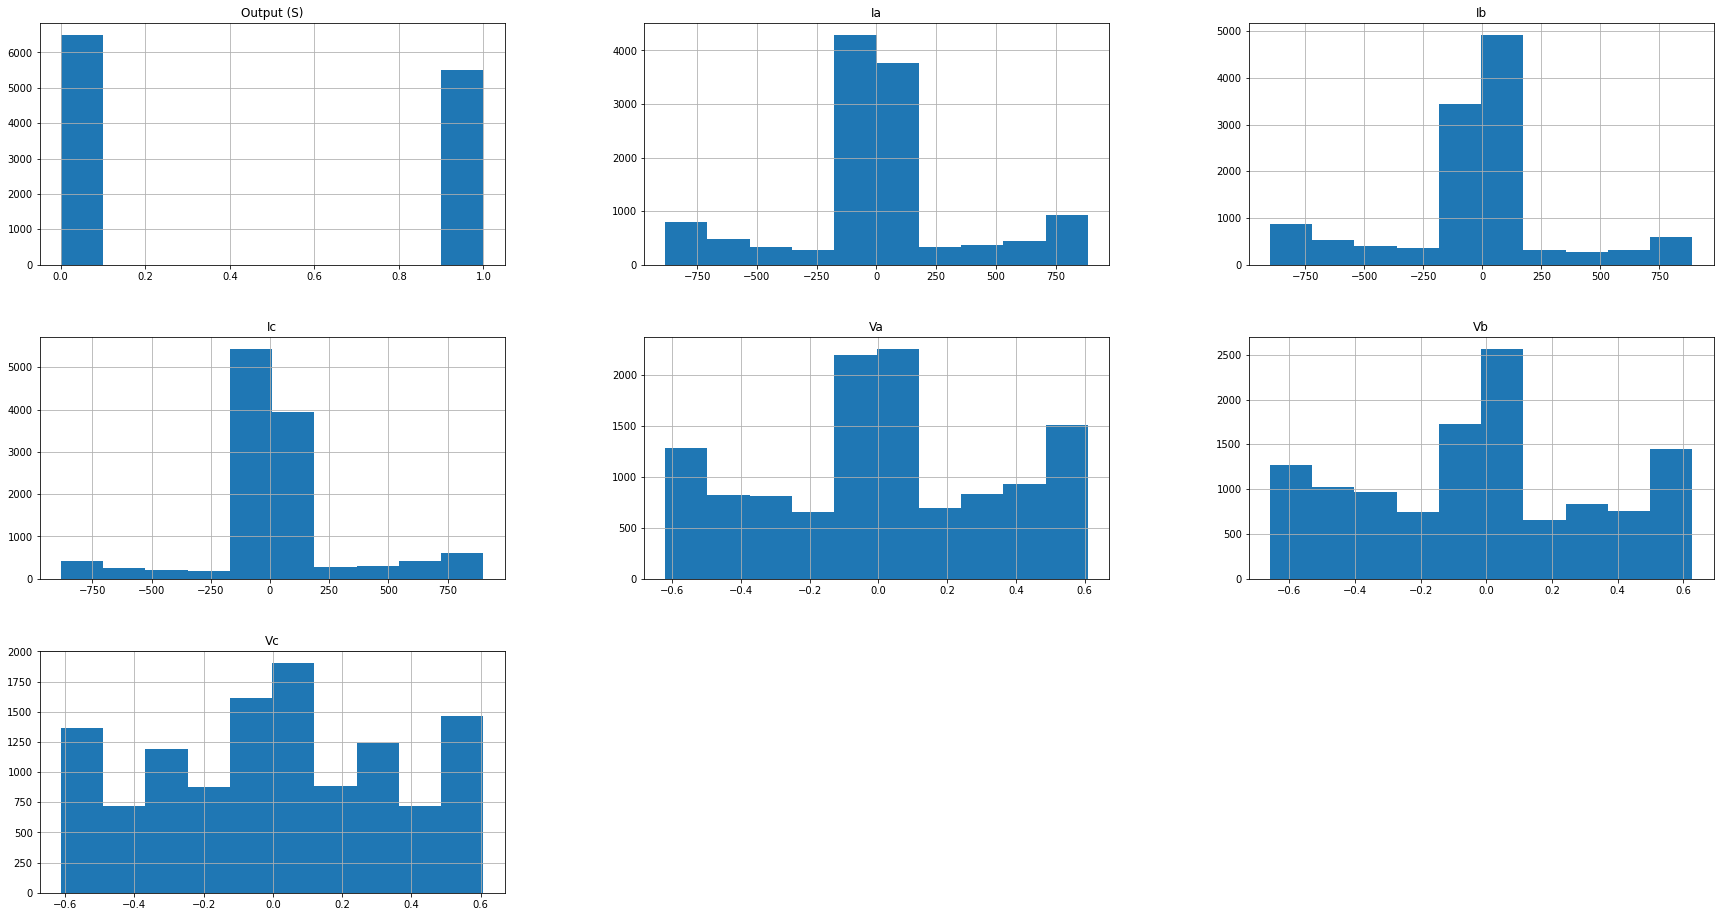

In [59]:
df.hist(figsize = (30, 16))

### Count plot

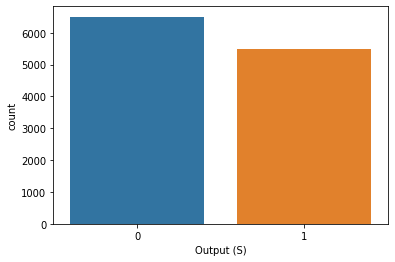

In [60]:
# count plot of Output (S) column
sns.countplot(df["Output (S)"])

# Box plot


A boxplot is a standardized way of displaying the dataset based on a five-number summary:

    1. Minimum (Q0 or 0th percentile): the lowest data point excluding any outliers.

    2. Maximum (Q4 or 100th percentile): the largest data point excluding any outliers.

    3. Median (Q2 or 50th percentile): the middle value of the dataset.

    4. First quartile (Q1 or 25th percentile): also known as the lower quartile qn(0.25), is the median of the lower half of the dataset.

    5. Third quartile (Q3 or 75th percentile): also known as the upper quartile qn(0.75), is the median of the upper half of the dataset

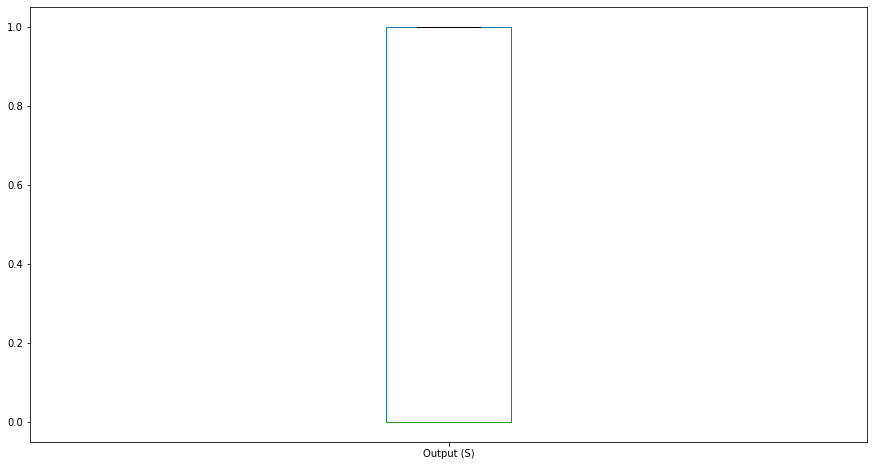

In [61]:
# box plot using pandas 
# box plot for Output (S) column 
df.boxplot("Output (S)", figsize = (15, 8), grid = False)


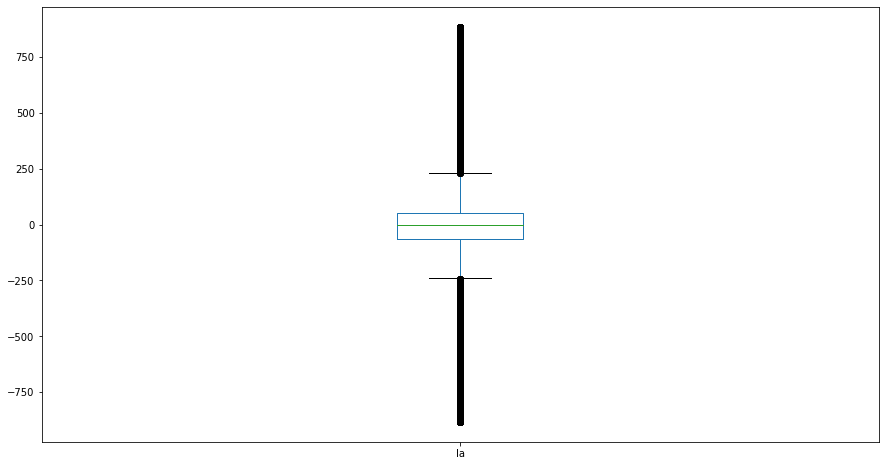

In [62]:
# box plot using pandas 
# box plot for Ia column 
df.boxplot("Ia", figsize = (15, 8), grid = False)



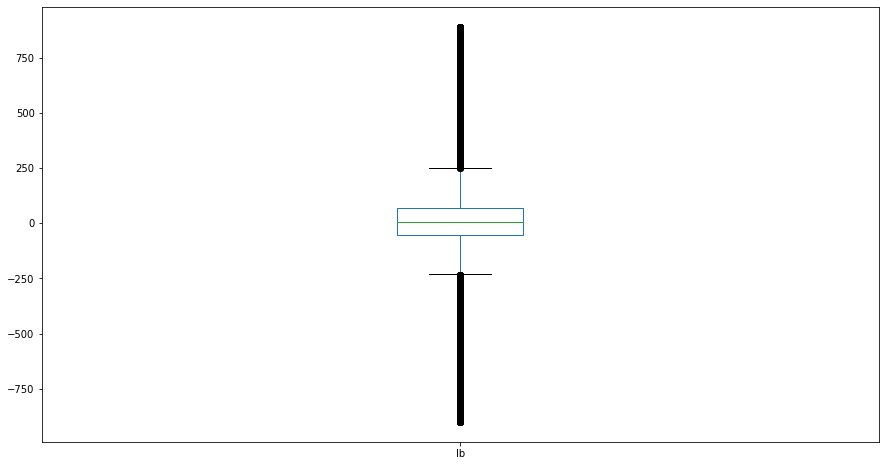

In [63]:
# box plot using pandas 
# box plot for Ib column 

df.boxplot("Ib", figsize = (15, 8), grid = False)


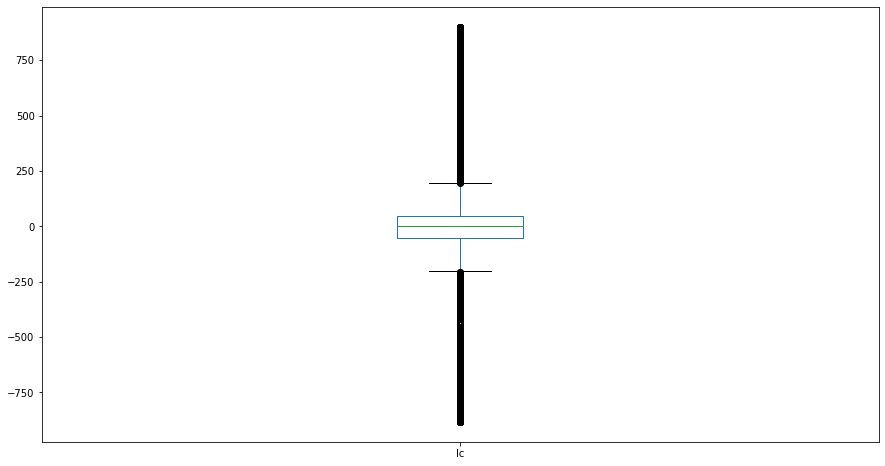

In [64]:
# box plot using pandas 
# box plot for Ic column 
df.boxplot("Ic", figsize = (15, 8), grid = False)



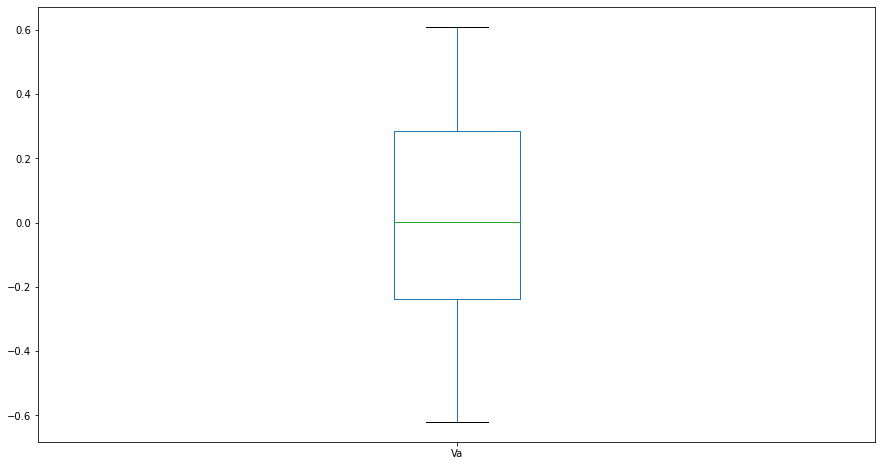

In [65]:
# box plot using pandas 
# box plot for Va column 

df.boxplot("Va", figsize = (15, 8), grid = False)


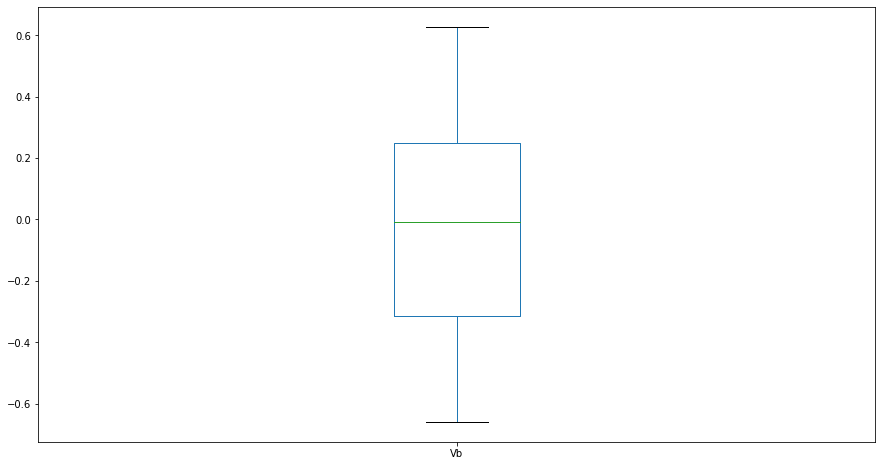

In [66]:
# box plot using pandas 
# box plot for Vb column 

df.boxplot("Vb", figsize = (15, 8), grid = False)


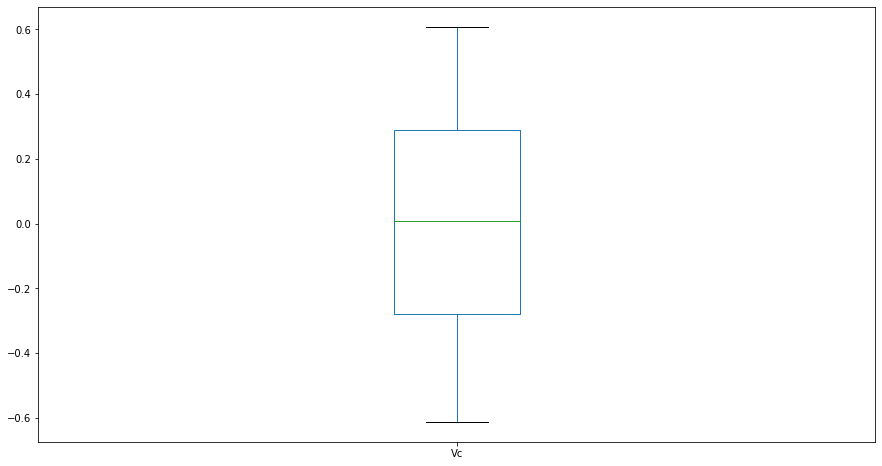

In [67]:
# box plot using pandas 
# box plot for Vc column 

df.boxplot("Vc", figsize = (15, 8), grid = False)


Dataset is balanced and not skewed in nature

# Dendrogram

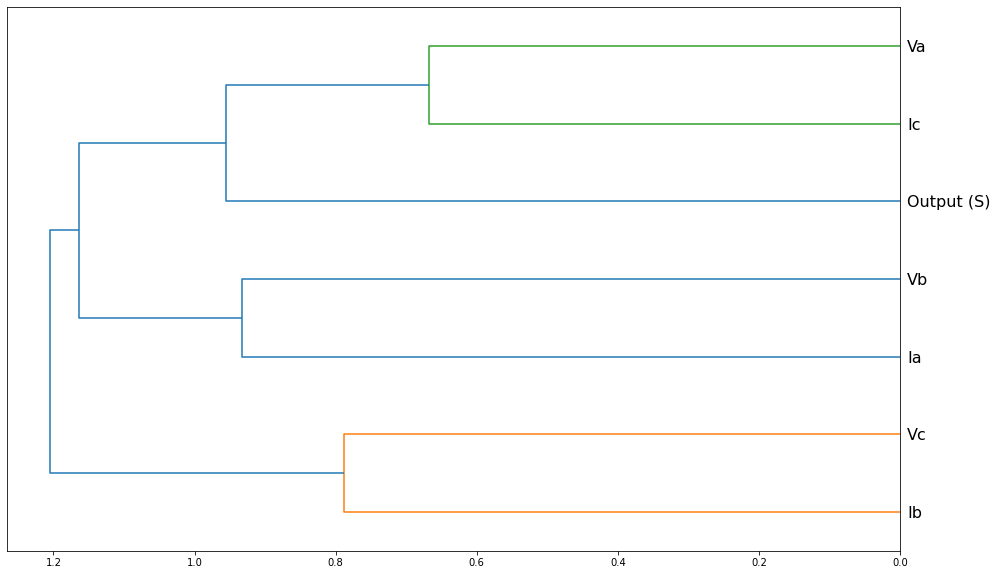

In [68]:
# Plot a Dendrogram on the columns of the dataset

# droping the NaN values
# Plot a Dendrogram on the columns of the dataset

# droping the NaN values
X = df.dropna()

import scipy
from scipy.cluster import hierarchy as hc
# import scipy, hierarchy as hc



corr = np.round(scipy.stats.spearmanr(X).correlation, 4)
corr_condensed = hc.distance.squareform(1 - corr)
z = hc.linkage(corr_condensed, method = "average")
fig = plt.figure(figsize = (16, 10))
dendrogram = hc.dendrogram(z, labels = X.columns,orientation = "left", leaf_font_size = 16)
plt.show()



# Preprocessing, Modeling and prediction on test data

In [69]:
## Split the labels and the target
X = df.drop("Output (S)", axis = 1)
y = df["Output (S)"]
#check the shape 
X.shape, y.shape

((12001, 6), (12001,))

In [70]:
# import train test split
from sklearn.model_selection import train_test_split
# Split into training (80%) and testing set (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# check shape of X_train and y_train
print(X_train.shape, y_train.shape)

# check shape of X_test and y_test
X_test.shape, y_test.shape


(9600, 6) (9600,)


((2401, 6), (2401,))

### Scaling

In [71]:
# import min max scalar
from sklearn.preprocessing import MinMaxScaler

# Instantiate t
t = MinMaxScaler()

# fit on train data
X_train = t.fit_transform(X_train)

# fit on test data
X_test = t.transform(X_test)

In [81]:
def visualize_importance(feature_importances, feat_train_df):
    # creating dataframe for feature name and feature importance
    feature_importance_df = pd.DataFrame()

    _df = pd.DataFrame()
    _df['feature_importance'] = feature_importances
    _df['column'] = feat_train_df.columns
    feature_importance_df = pd.concat([feature_importance_df, _df], axis = 0, ignore_index = True)
    
                               
    
    # grouping all data and sorting in descending order
    order = feature_importance_df.groupby("column").sum()[["feature_importance"]].sort_values("feature_importance", ascending = False).index[:50]

    
    # ploting feature importance data using boxenplot
    fig, ax = plt.subplots(figsize = (8, max(6, len(order) * 0.25)))
    sns.boxenplot(data = feature_importance_df, x = "feature_importance", y = "column", ax= ax, order = order, palette = "viridis", orient = "h")
    ax.tick_params(axis = "x", rotation = 0)
    ax.set_title("Importance")
    ax.grid()
    fig.tight_layout()
    return fig, ax
    

In [82]:
from sklearn.metrics import accuracy_score, precision_score, precision_score, confusion_matrix, recall_score



## LogisticRegression

accuracy_score:  0.7338608912952936
precision _score 0.41643835616438357
recall_score 1.0
[[1306  639]
 [   0  456]]
CPU times: user 269 ms, sys: 204 ms, total: 473 ms
Wall time: 400 ms


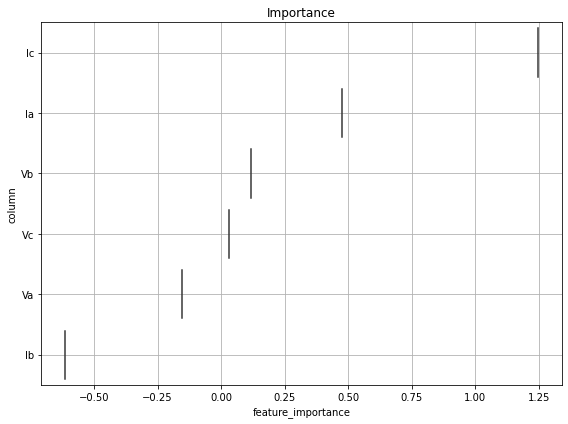

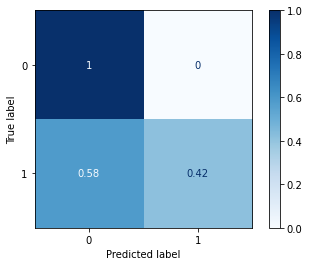

In [83]:
%%time
# Fit a Log istic Regression model to the train dataset
from sklearn import metrics
# Import Log isticRegressor
from sklearn.linear_model import LogisticRegression

# Instantiate the model
log_class = LogisticRegression()

# fitting the model on train data
log_class.fit(X_train, y_train)

#predict on test data
y_pred_log = log_class.predict(X_test)

# prin t accuracy_score ,precisi on_score,precision_score,confusion_matrix
print("accuracy_score: ", accuracy_score(y_pred_log, y_test))
print("precision _score" , precision_score(y_pred_log, y_test))
print("recall_score" , recall_score(y_pred_log, y_test))
print(confusion_matrix(y_pred_log,y_test))

# visualizing importance of features
fig, ax = visualize_importance(log_class.coef_[0], X)

# display confusion matrix
disp = metrics.plot_confusion_matrix(log_class, X_test, y_test,cmap= plt.cm.Blues, normalize= 'true')


## RandomForestClassifier

accuracy_score:  0.9979175343606831
precision _score 0.9990867579908675
recall_score 0.9963570127504554
[[1302    1]
 [   4 1094]]
CPU times: user 2.82 s, sys: 64.1 ms, total: 2.89 s
Wall time: 2.83 s


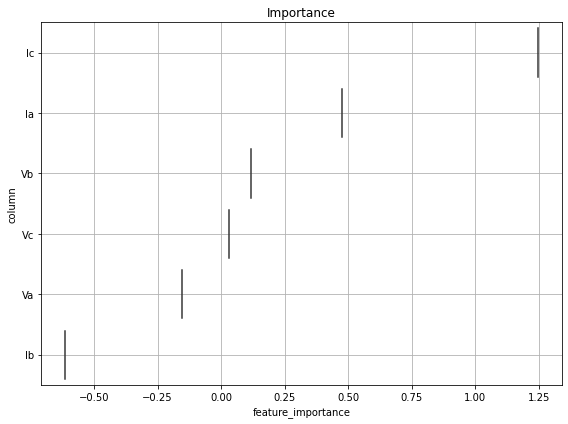

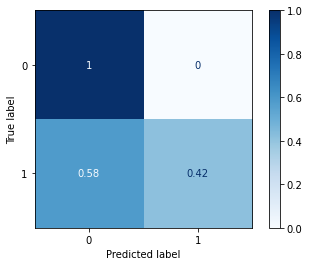

In [91]:
%%time
# Fit a RandomForestClassifier model to the train dataset

#import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# Instantiate the model
rf = RandomForestClassifier(n_estimators = 200, max_depth = 40)

# fitting the model on train data
rf.fit(X_train, y_train)

# predict on test data
y_pred_rf = rf.predict(X_test)

# print accuracy_score,precision_score,precision_score,confusion_matrix
print("accuracy_score: ", accuracy_score(y_pred_rf, y_test))
print("precision _score" , precision_score(y_pred_rf, y_test))
print("recall_score" , recall_score(y_pred_rf, y_test))
print(confusion_matrix(y_pred_rf,y_test))

# visualizing importance of features
fig, ax = visualize_importance(log_class.coef_[0], X)

# display confusion matrix
disp = metrics.plot_confusion_matrix(log_class, X_test, y_test,cmap= plt.cm.Blues, normalize= 'true')


## DecisionTreeClassifier

accuracy_score:  0.9958350687213661
precision _score 0.9963470319634703
recall_score 0.9945305378304466
[[1300    4]
 [   6 1091]]
CPU times: user 189 ms, sys: 42.5 ms, total: 232 ms
Wall time: 182 ms


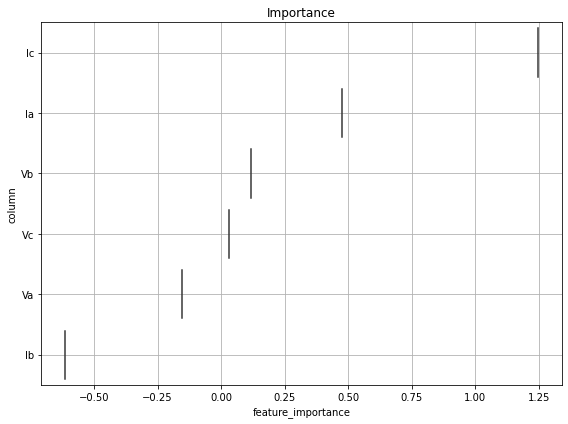

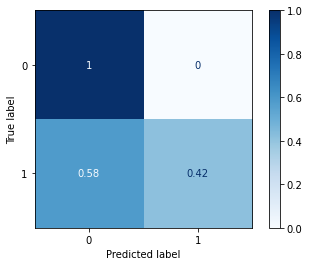

In [92]:
%%time
# Fit a DecisionTreeClassifier model to the train dataset

#import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

# Instantiate the model
dt = DecisionTreeClassifier()

# fitting the model on train data
dt.fit(X_train, y_train)

# predict on test data
y_pred = dt.predict(X_test)

# print accuracy_score,precision_score,precision_score,confusion_matrix
print("accuracy_score: ", accuracy_score(y_pred, y_test))
print("precision _score" , precision_score(y_pred, y_test))
print("recall_score" , recall_score(y_pred, y_test))
print(confusion_matrix(y_pred,y_test))

# visualizing importance of features
fig, ax = visualize_importance(log_class.coef_[0], X)

# display confusion matrix
disp = metrics.plot_confusion_matrix(log_class, X_test, y_test,cmap= plt.cm.Blues, normalize= 'true')



## GradientBoostingClassifier

accuracy_score:  0.9979175343606831
precision _score 0.9990867579908675
recall_score 0.9963570127504554
[[1302    1]
 [   4 1094]]
CPU times: user 2.38 s, sys: 55.6 ms, total: 2.43 s
Wall time: 2.37 s


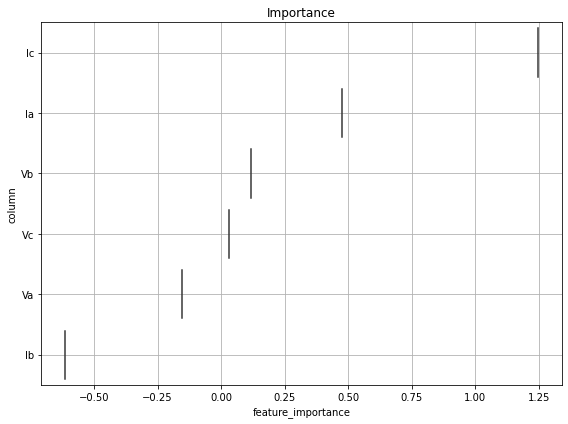

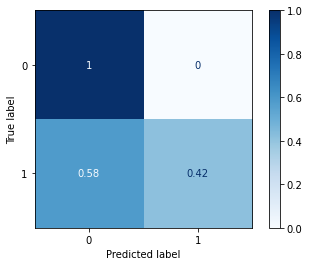

In [93]:
%%time
# Fit a Gradient Boosting Classifier model to the train dataset

# Import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Instantiate the model
gb = GradientBoostingClassifier()

# fitting the model on train data
gb.fit(X_train, y_train)

# predict on test data
y_pred_gb = gb.predict(X_test)

# print accuracy_score,precision_score,precision_score,confusion_matrix
print("accuracy_score: ", accuracy_score(y_pred_gb, y_test))
print("precision _score" , precision_score(y_pred_gb, y_test))
print("recall_score" , recall_score(y_pred_gb, y_test))
print(confusion_matrix(y_pred_gb,y_test))

# visualizing importance of features
fig, ax = visualize_importance(log_class.coef_[0], X)

# display confusion matrix
disp = metrics.plot_confusion_matrix(log_class, X_test, y_test,cmap= plt.cm.Blues, normalize= 'true')


## Hyper parameter tunning

A hyperparameter is a parameter whose value is set before the learning process begins.

Hyperparameters tuning is crucial as they control the overall behavior of a machine learning model.

Every machine learning models will have different hyperparameters that can be set.

###RandomizedSearchCV

RandomizedSearchCV is very useful when we have many parameters to try and the training time is very long.

1. The first step is to write the parameters that we want to consider
2. From these parameters select the best ones.(which are printed in output)

In [94]:
# Helper function to perform hyper parameter tunning with RandomizedSearchCV
def random_Search(model,X_train, Y_train,param_grid):
    from sklearn.model_selection import RandomizedSearchCV

    # Random search of parameters, using 3 fold cross validation, 
    # search across 100 different combinations, and use all available cores
    # Fit the random search model
    random = RandomizedSearchCV(estimator = model, param_distributions= param_grid, n_iter = 20, cv = 3, verbose = 2, random_state = 42, n_jobs = -1)
    # fit train data
    random.fit(X_train, Y_train)

    
    print("\n Best parameters: ",random.best_params_)

In [95]:
%%time
# create parameters dict for tunning
rf_para_grid = {'n_estimators': [int(x) for x in np.linspace(start = 200, stop = 400, num = 50)],
               'max_features': ['auto', 'sqrt'],
               'max_depth': [int(x) for x in np.linspace(3, 9, num = 3)],
               'min_samples_split': [2, 5, 10],
               'min_samples_leaf': [1, 2, 4],
               'bootstrap': [True, False]}

# passing data for hyper parameter tunning with Randomized search cv

random_Search(RandomForestClassifier(), X_train, y_train, param_grid = rf_para_grid)



Fitting 3 folds for each of 20 candidates, totalling 60 fits

 Best parameters:  {'n_estimators': 338, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 9, 'bootstrap': False}
CPU times: user 7.06 s, sys: 146 ms, total: 7.21 s
Wall time: 2min 12s


### working with best model

In [97]:
# print Area under ROC of Model On Test Set
from sklearn.metrics import roc_auc_score
score= roc_auc_score(y_test, y_pred_rf)
score

0.9980119854272868

In [98]:
# Create a dataframe with predicted result as data using best model
predictions = pd.DataFrame(y_pred_rf)


In [100]:
predictions.head()

,0
0,0
1,1
2,0
3,0
4,0


# Conclusion

According to this model, the predicted value we got, matches with the actual target values. The model is performing well.  We have performed EDA, preprocessing, build different models, visualized feature importance, did hyper parameter tunning and did prediction.

## Congratulation for completing the assignment.
You have learned a lot while doing this assignment.